# Is Unrooted GNC a Reasonable Proxy for Rooted GNC?
### Setup

In [1]:
import os
from json import dumps

from IPython.display import Markdown, display, Image
from numpy import average, std, array, round, sqrt
from pymongo import MongoClient
from pandas import DataFrame, set_option

In [2]:
%load_ext rpy2.ipython
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='|S9')

In [3]:
try:
    os.mkdir('bias_bias')
except OSError:
    pass

### Utility

In [4]:
def stats_for_model(gen, fits, taxa):
    real_ens = {t.encode('utf-8'):d for t,d in gen['lf']['EN'].items()}
    real_ens['Opossum'] += real_ens['internal']
    real_omega = {t:o['bin0'] for t,o in gen['lf']['params']['omega'].items()}
    
    proxy_ens = {}
    proxy_omega = {}
    for taxon in taxa:
        ens = {}
        omega = {}
        for fit in proxy.find({'_id' : { '$regex' : '^'+doc['_id'] }}):
            ens[fit['_id']] = fit['lf']['EN'][taxon]
            omega[fit['_id']] = fit['lf']['params']['omega'][taxon]['bin0']
        if len(ens) == 0:
            return None
        proxy_ens[taxon] = ens
        proxy_omega[taxon] = omega
    
    rows = []
    excluded = []
    for model, col in fits:
        for taxon in taxa:
            real_ens_bias = []
            proxy_ens_bias = []
            real_omega_bias = []
            proxy_omega_bias = []
            for fit in col.find({'_id' : { '$regex' : '^'+doc['_id'] }}):
                if fit['lf']['params']['omega'][taxon]['bin0'] >= 100:
                    excluded.append(fit['_id'])
                    continue
                real_ens_bias.append(fit['lf']['EN'][taxon] - real_ens[taxon])
                proxy_ens_bias.append(fit['lf']['EN'][taxon] - proxy_ens[taxon][fit['_id']])
                real_omega_bias.append(fit['lf']['params']['omega'][taxon]['bin0'] - real_omega[taxon])
                proxy_omega_bias.append(fit['lf']['params']['omega'][taxon]['bin0'] - proxy_omega[taxon][fit['_id']])
            rows.append((average(real_ens_bias), average(proxy_ens_bias), model, 'ENS', taxon))
            rows.append((average(real_omega_bias), average(proxy_omega_bias), model, 'omega', taxon))
    return {'columns' : ('real_bias', 'proxy_bias', 'model', 'parameter', 'branch'), 'rows' : rows, 
            'excluded' : excluded}    

def printmd(string):
    ''' thanks http://stackoverflow.com/questions/32026727/format-output-of-code-cell-with-markdown '''
    display(Markdown(string))

def print_logs(log,  level='INFO'):
    printmd('##### ' + log.name)
    for d in log.find({'level':level}):
        printmd(dumps(d['message']))

### Load the Data

In [6]:
client = MongoClient()

In [7]:
truth = client.mammals.GNC_picked2
proxy = client.mammals.GNC_picked_sims2
fits = [
    ('Y98', client.mammals.Y98_picked_sims2),
    ('CNFGTR', client.mammals.CNFGTR_picked_sims2)
]
taxa = ['Mouse','Human','Opossum']
logs = [
    ('GNC', client.mammals.GNC_picked_sims2.log),
    ('Y98', client.mammals.Y98_picked_sims2.log),
    ('CNFGTR', client.mammals.CNFGTR_picked_sims2.log)
]
for name, log in logs:
    printmd('#### ' + name)
    print_logs(log)

#### GNC

##### GNC_picked_sims2.log

{"function": "ml.ml", "start_over": true, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_picked2", "output_collection": "mammals.GNC_picked_sims2", "kwargs_file": "../config/GNC.json", "output_collections_file": null, "db_host": "r698", "input_collections_file": null, "input_collections": ["mammals.data_picked2"], "kwargs": {"model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_picked_sims2"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev", "map_collection": "0.0.9-dev"}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_picked2", "output_collection": "mammals.GNC_picked_sims2", "kwargs_file": "../config/GNC.json", "output_collections_file": null, "db_host": "r179", "input_collections_file": null, "input_collections": ["mammals.data_picked2"], "kwargs": {"model": "GNC"}, "log_name": "log", "output_collections": ["mammals.GNC_picked_sims2"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev", "map_collection": "0.0.9-dev"}

#### Y98

##### Y98_picked_sims2.log

{"function": "ml.ml", "start_over": true, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_picked2", "output_collection": "mammals.Y98_picked_sims2", "kwargs_file": "../config/Y98.json", "output_collections_file": null, "db_host": "r698", "input_collections_file": null, "input_collections": ["mammals.data_picked2"], "kwargs": {"model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_picked_sims2"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev", "map_collection": "0.0.9-dev"}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_picked2", "output_collection": "mammals.Y98_picked_sims2", "kwargs_file": "../config/Y98.json", "output_collections_file": null, "db_host": "r179", "input_collections_file": null, "input_collections": ["mammals.data_picked2"], "kwargs": {"model": "Y98"}, "log_name": "log", "output_collections": ["mammals.Y98_picked_sims2"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev", "map_collection": "0.0.9-dev"}

#### CNFGTR

##### CNFGTR_picked_sims2.log

{"function": "ml.ml", "start_over": true, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_picked2", "output_collection": "mammals.CNFGTR_picked_sims2", "kwargs_file": "../config/CNFGTR.json", "output_collections_file": null, "db_host": "r698", "input_collections_file": null, "input_collections": ["mammals.data_picked2"], "kwargs": {"model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_picked_sims2"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev", "map_collection": "0.0.9-dev"}

{"function": "ml.ml", "start_over": false, "log_level": "DEBUG", "no_mpi_main_loop": false, "input_collection": "mammals.data_picked2", "output_collection": "mammals.CNFGTR_picked_sims2", "kwargs_file": "../config/CNFGTR.json", "output_collections_file": null, "db_host": "r179", "input_collections_file": null, "input_collections": ["mammals.data_picked2"], "kwargs": {"model": "CNFGTR"}, "log_name": "log", "output_collections": ["mammals.CNFGTR_picked_sims2"]}

{"mong": "0.0.11-dev", "monglog": "0.0.2-dev", "masterslave": "0.0.11-dev", "ml": "0.0.12-dev", "map_collection": "0.0.9-dev"}

In [8]:
rows = []
excluded = []
for doc in truth.find():
    stats = stats_for_model(doc, fits, taxa)
    if stats is None:
        continue
    rows.extend(stats['rows'])
    excluded.extend(stats['excluded'])
    columns = stats['columns']
printmd('#### Excluded Fits\n'+'\n'.join(excluded))
printmd(str(len(excluded))+' fits excluded')
df = DataFrame(rows, columns=columns)
name = os.path.join('bias_bias', 'bias_bias.png')

#### Excluded Fits
ENSG00000005436_mammals_63
ENSG00000005436_mammals_63
ENSG00000162614_mammals_11
ENSG00000162614_mammals_67
ENSG00000172061_mammals_20
ENSG00000172061_mammals_40
ENSG00000172061_mammals_55
ENSG00000172061_mammals_74
ENSG00000172061_mammals_83
ENSG00000106443_mammals_05
ENSG00000106443_mammals_47
ENSG00000139517_mammals_50
ENSG00000176371_mammals_09
ENSG00000176371_mammals_18
ENSG00000176371_mammals_21
ENSG00000176371_mammals_22
ENSG00000176371_mammals_29
ENSG00000176371_mammals_30
ENSG00000176371_mammals_31
ENSG00000176371_mammals_40
ENSG00000176371_mammals_44
ENSG00000176371_mammals_47
ENSG00000176371_mammals_52
ENSG00000176371_mammals_56
ENSG00000176371_mammals_58
ENSG00000176371_mammals_75
ENSG00000176371_mammals_78
ENSG00000176371_mammals_79
ENSG00000176371_mammals_81
ENSG00000176371_mammals_82
ENSG00000176371_mammals_83
ENSG00000176371_mammals_91
ENSG00000176371_mammals_92
ENSG00000176371_mammals_97
ENSG00000176371_mammals_09
ENSG00000176371_mammals_22
ENSG00000176371_mammals_29
ENSG00000176371_mammals_31
ENSG00000176371_mammals_32
ENSG00000176371_mammals_40
ENSG00000176371_mammals_43
ENSG00000176371_mammals_44
ENSG00000176371_mammals_47
ENSG00000176371_mammals_58
ENSG00000176371_mammals_77
ENSG00000176371_mammals_78
ENSG00000176371_mammals_81
ENSG00000176371_mammals_82
ENSG00000176371_mammals_83
ENSG00000176371_mammals_97

50 fits excluded

### Generate the Plot

In [9]:
%%R -i df,name
df$model <- factor(df$model)
gg <- ggplot(df) +
    geom_point(aes(proxy_bias, real_bias, shape=model)) +
    xlab('Real Bias') +
    ylab('Proxy Bias') +
    geom_abline(slope=1, size=0.1) +
    facet_wrap(parameter ~ branch, scale='free', labeller=label_parsed) +
    coord_fixed(ratio=1)
ggsave(name, gg, width=10, height=6)

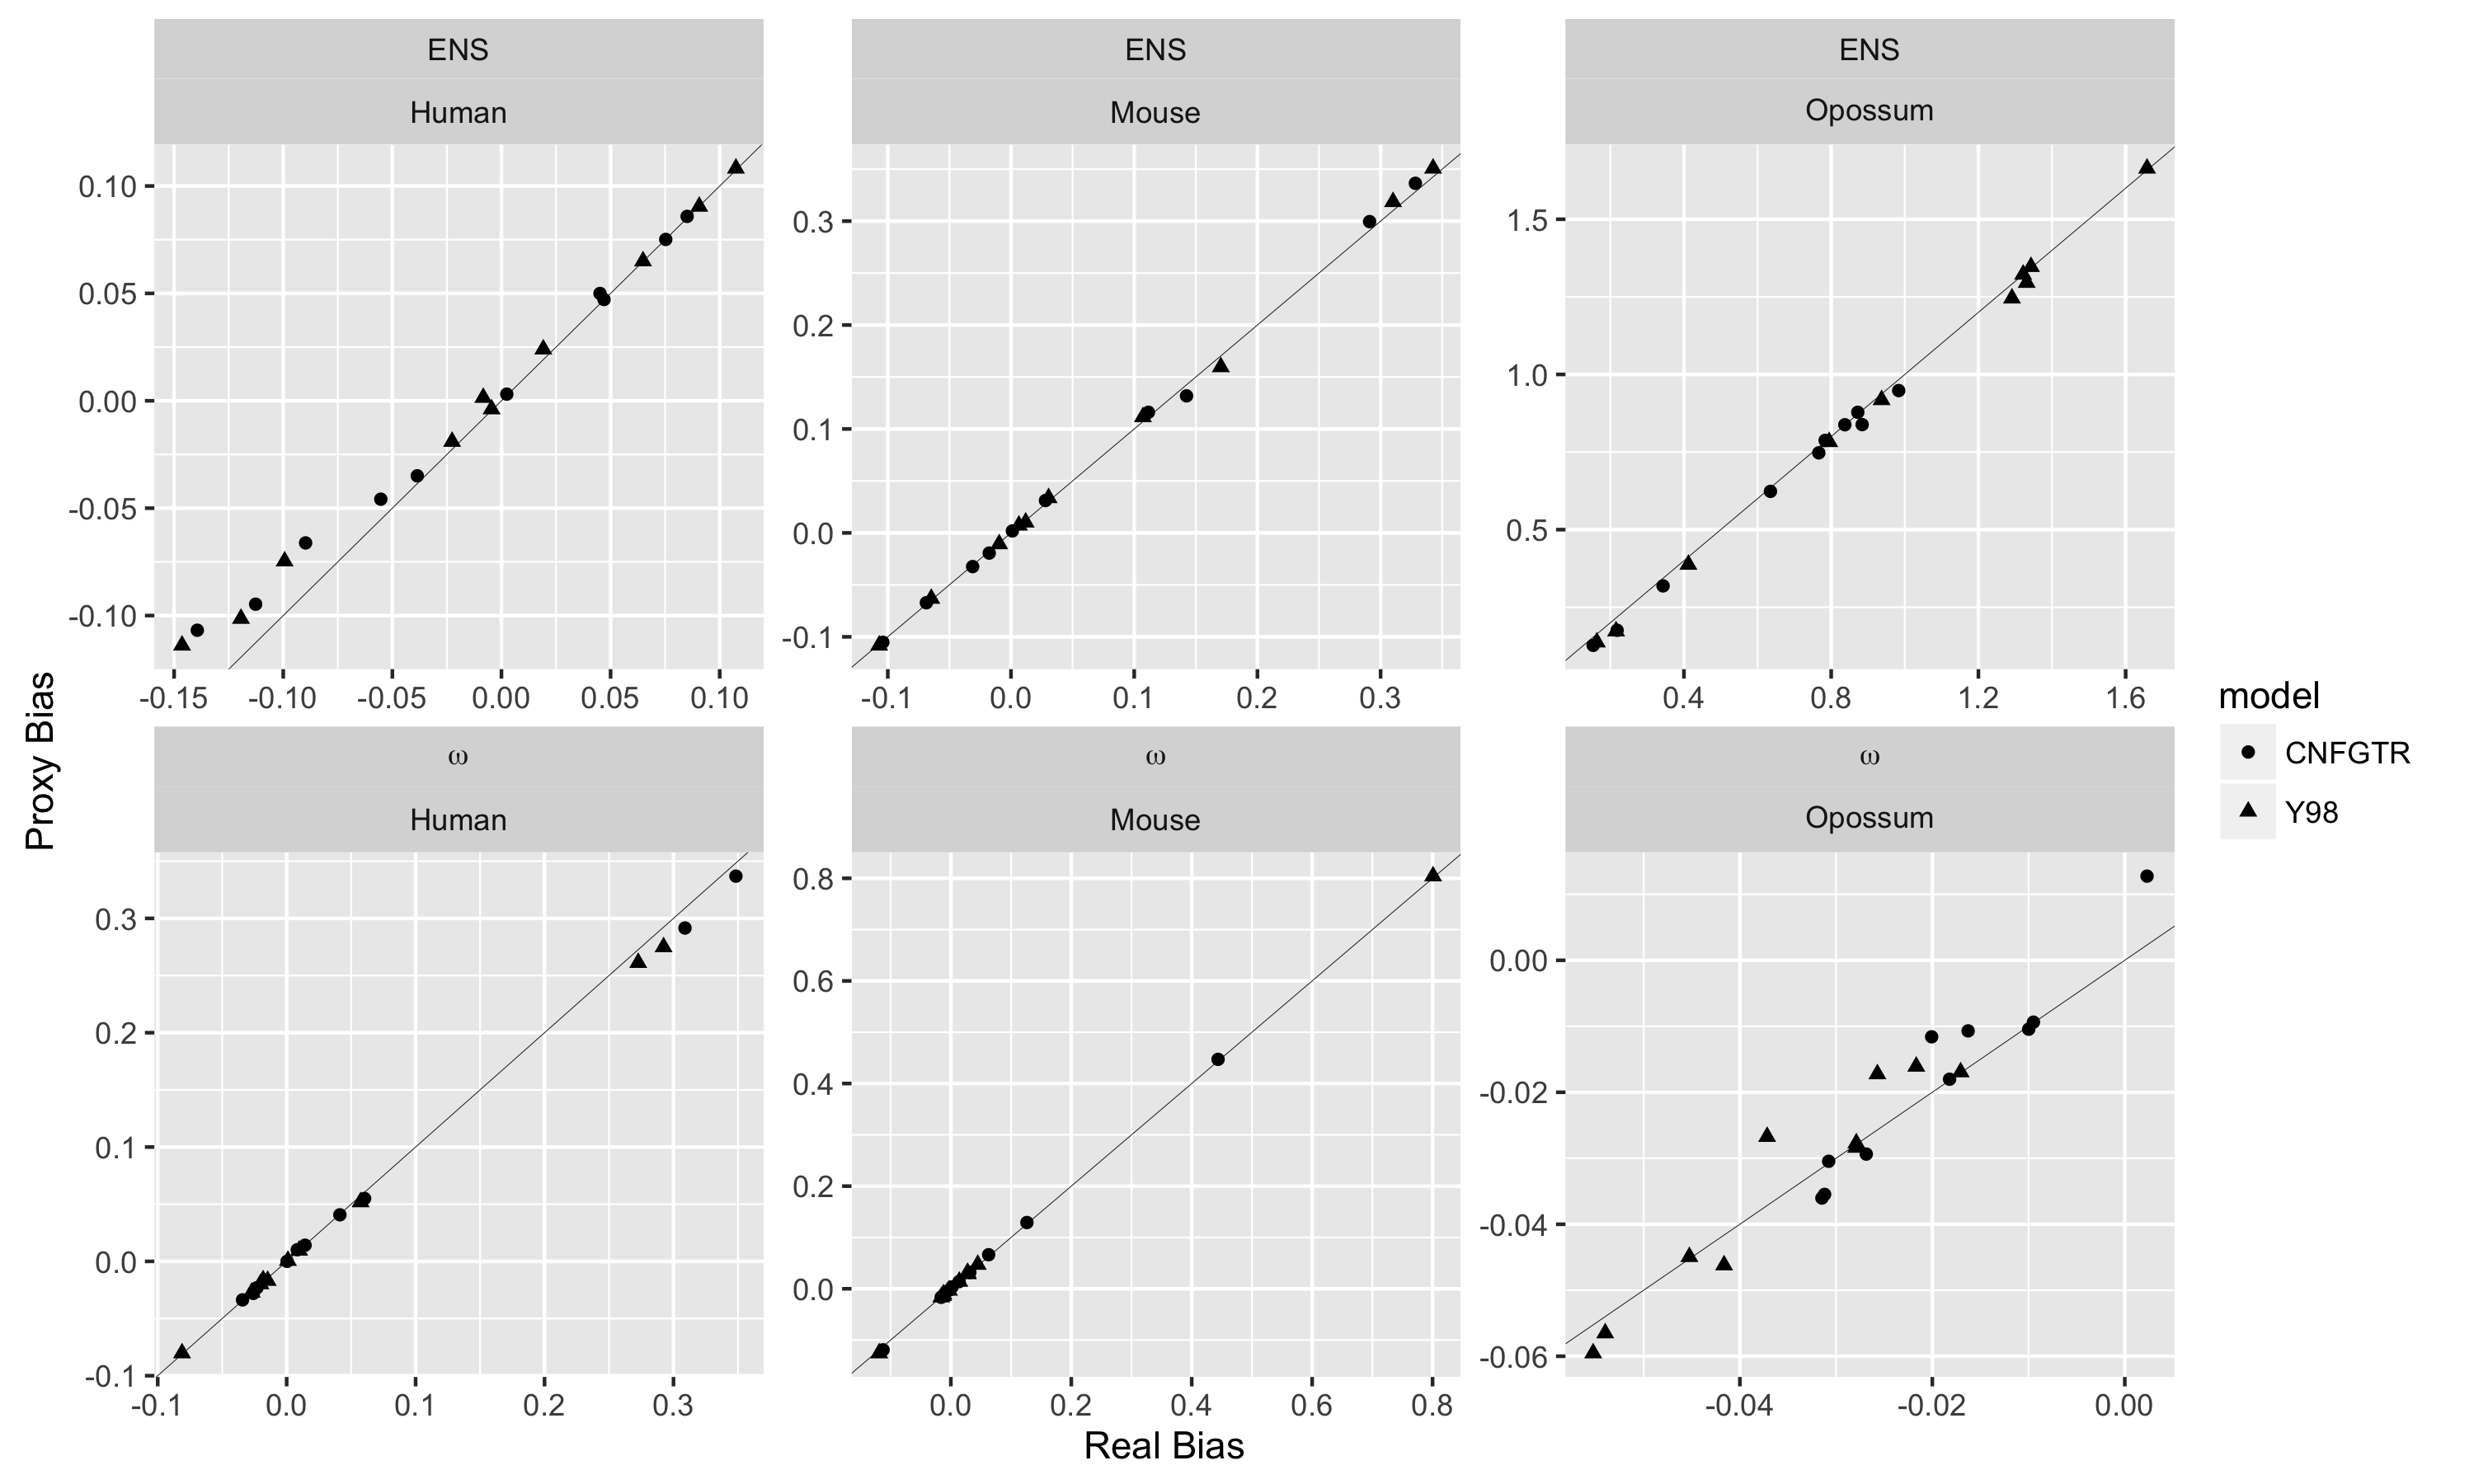

In [10]:
display(Image(name))